In [ ]:
import os

from tensorflow.keras import layers
from tensorflow.keras import Model
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
  
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
  layer.trainable = False
  
pre_trained_model.summary()

last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

--2021-07-21 01:49:32--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   120MB/s    in 0.7s    

2021-07-21 01:49:33 (120 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                    

In [ ]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [ ]:
for layer in pre_trained_model.layers:
  layer.trainable = False

In [ ]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (9, activation='softmax')(x)           

model = Model( pre_trained_model.input, x) 

model.compile(optimizer = 'adam',#RMSprop(lr=0.0001), 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [ ]:
model.compile(optimizer = 'adam',#RMSprop(lr=0.0001), 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import zipfile

# Define our example directories and files
base_dir = '/content/drive/MyDrive/FISIKA/Images'

train_dir = os.path.join( base_dir, 'Training')
validation_dir = os.path.join( base_dir, 'Validation')

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   horizontal_flip = True)

# Validation data should not be augmented
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 7,
                                                    class_mode = 'categorical', 
                                                    target_size = (150, 150))     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory( validation_dir,
                                                          batch_size  = 7,
                                                          class_mode  = 'categorical', 
                                                          target_size = (150, 150))

Found 459 images belonging to 9 classes.
Found 117 images belonging to 9 classes.


In [ ]:
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 10,
            epochs = 20,
            validation_steps = 7,
            verbose = 2)

Epoch 1/20
10/10 - 124s - loss: 7.7194 - accuracy: 0.2090 - val_loss: 3.9140 - val_accuracy: 0.3878
Epoch 2/20
10/10 - 77s - loss: 3.3666 - accuracy: 0.5429 - val_loss: 3.3212 - val_accuracy: 0.5102
Epoch 3/20
10/10 - 63s - loss: 1.9009 - accuracy: 0.7000 - val_loss: 3.0103 - val_accuracy: 0.6735
Epoch 4/20
10/10 - 50s - loss: 2.4187 - accuracy: 0.5672 - val_loss: 3.2990 - val_accuracy: 0.5918
Epoch 5/20
10/10 - 50s - loss: 2.0678 - accuracy: 0.6714 - val_loss: 1.5239 - val_accuracy: 0.7143
Epoch 6/20
10/10 - 46s - loss: 1.5199 - accuracy: 0.7714 - val_loss: 1.7970 - val_accuracy: 0.6327
Epoch 7/20
10/10 - 42s - loss: 0.5261 - accuracy: 0.8286 - val_loss: 1.1616 - val_accuracy: 0.7143
Epoch 8/20
10/10 - 41s - loss: 0.8855 - accuracy: 0.7714 - val_loss: 1.6255 - val_accuracy: 0.7347
Epoch 9/20
10/10 - 38s - loss: 0.7209 - accuracy: 0.8714 - val_loss: 2.4157 - val_accuracy: 0.6327
Epoch 10/20
10/10 - 33s - loss: 0.6188 - accuracy: 0.8429 - val_loss: 1.1269 - val_accuracy: 0.7959
Epoch 11

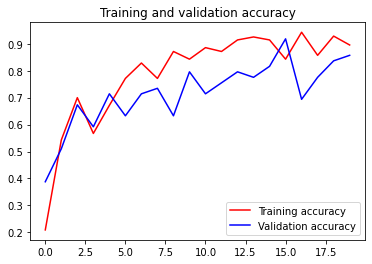

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
!mkdir -p saved_inception/
model.save('saved_inception/money_inception')

model.save('money_inception.h5')

!zip -r saved_inception.zip /content/saved_inception

from google.colab import files
files.download("saved_inception.zip")
files.download("/content/money_inception.h5")

INFO:tensorflow:Assets written to: saved_inception/money_inception/assets
  adding: content/saved_inception/ (stored 0%)
  adding: content/saved_inception/money_inception/ (stored 0%)
  adding: content/saved_inception/money_inception/assets/ (stored 0%)
  adding: content/saved_inception/money_inception/saved_model.pb (deflated 93%)
  adding: content/saved_inception/money_inception/variables/ (stored 0%)
  adding: content/saved_inception/money_inception/variables/variables.data-00000-of-00001 (deflated 23%)
  adding: content/saved_inception/money_inception/variables/variables.index (deflated 78%)
  adding: content/saved_inception/money_inception/keras_metadata.pb (deflated 96%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>